In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob
import math
import seaborn as sns
from matplotlib import cm
import os

genltl_csvs = [
    'ccj-alpha_1..12.csv',
    'rv-counter_1..12.csv',
    'ccj-beta-prime_1..12.csv',
    'tv-uu_1..12.csv',
    'kr-n_1..4.csv',
    'pps-arbiter-standard_1..4.csv'
]

csvs = [
    'ba-known.ltl.csv', 'misc.csv',
    'ba-new-fair2.ltl.neg.csv', 'pps-arbiter-standard_1..4.csv',
    'ba-new-fair2.ltl.pos.csv', 'rv-counter_1..12.csv',
    'ba-new.ltl.neg.csv', 'tgba-known.ltl.csv',
    'ba-new.ltl.pos.csv', 'tgba-new-fair2.ltl.neg.csv',
    'ba-new-strong1.ltl.neg.csv', 'tgba-new-fair2.ltl.pos.csv',
    'ba-new-strong1.ltl.pos.csv', 'tgba-new.ltl.neg.csv',

    'ba-new-strong2.ltl.neg.csv', 'tgba-new.ltl.pos.csv',
    'ba-new-strong2.ltl.pos.csv', 'tgba-new-strong1.ltl.neg.csv',
    'ba-new-weak3.ltl.neg.csv', 'tgba-new-strong1.ltl.pos.csv',
    'ba-new-weak3.ltl.pos.csv',
    'tgba-new-strong2.ltl.neg.csv',

    
    'ccj-alpha_1..12.csv', 'tgba-new-strong2.ltl.pos.csv',
    'ccj-beta-prime_1..12.csv', 'tgba-new-weak3.ltl.neg.csv',
    'kr-n_1..4.csv', 'tgba-new-weak3.ltl.pos.csv',
    'tv-uu_1..12.csv'

    ]

In [2]:
def load_bench(path):
    df = pd.read_csv(path, comment='#')
    df.dropna(axis=1, how='all', inplace=True)
    df.drop('time_unit', axis=1, inplace=True)
    df['deg'] = df['edges'] / df['states']
    return df

def load_all(path):
    first = True
    all_bench = None

    for csv in csvs:
        try:
            tmp = load_bench(path + '/' + csv)

            if csv in genltl_csvs:
                tmp['source'] = 'genltl/' + csv[:-4]
            else:
                tmp['source'] = 'babiak.spin.13/' + csv[:-4]

            if first:
                all_bench = tmp
                first = False
            else:
                all_bench = all_bench.append(tmp)
        except:
            print('Fail to load', csv)
            pass
    try:        
        tmp = load_bench(path + '/misc.csv')
        tmp['source'] = 'rabbit + circuits'
        all_bench = all_bench.append(tmp)
    except:
        pass
        
    return all_bench


In [3]:
b = load_all('results-46')

In [4]:
new = b[b['name'].str.match('sim//*')]
old = b[b['name'].str.match('babiak//*')]

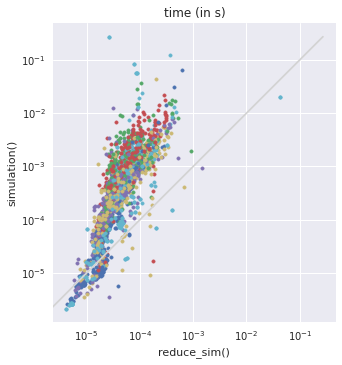

In [5]:
with plt.style.context('seaborn'):
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xscale('log')
    ax.set_yscale('log')

    max_val = 0
    
    cmap = matplotlib.cm.get_cmap('Set3')
    i = 0
    for k,d in new.groupby('source'):
#        if i != 11:
#            i += 1
#            continue
        b1 = new[new['source'] == k]
        b2 = old[old['source'] == k]
        ax.scatter(b1['real_time']/10**9, b2['real_time']/10**9, marker='.')#color=cmap(i), label=k)
        i += 1
        max_val = max(max_val, np.max(b1['real_time']/10**9), np.max(b2['real_time']/10**9))
    plt.plot([0, max_val], [0, max_val], c='lightgrey')

plt.title('time (in s)')
plt.xlabel('reduce_sim()')
plt.ylabel('simulation()')
#plt.legend()
plt.show()

In [6]:
# States reduction
print('diff', np.sum(new['red_states'].values != old['red_states'].values))
print('same', np.sum(new['red_states'].values == old['red_states'].values))

diff 224
same 2055


In [7]:
np.sum(new['red_states'].values > old['red_states'].values)

68

In [8]:
np.sum(new['red_states'].values < old['red_states'].values)

156

In [9]:
np.unique(new[new['red_states'].values < old['red_states'].values]['source'].values)

array(['babiak.spin.13/ba-known.ltl',
       'babiak.spin.13/ba-new-fair2.ltl.neg',
       'babiak.spin.13/ba-new-fair2.ltl.pos',
       'babiak.spin.13/ba-new-strong1.ltl.neg',
       'babiak.spin.13/ba-new-strong1.ltl.pos',
       'babiak.spin.13/ba-new-strong2.ltl.neg',
       'babiak.spin.13/ba-new-weak3.ltl.neg',
       'babiak.spin.13/ba-new-weak3.ltl.pos',
       'babiak.spin.13/ba-new.ltl.neg', 'babiak.spin.13/ba-new.ltl.pos',
       'babiak.spin.13/tgba-known.ltl',
       'babiak.spin.13/tgba-new-fair2.ltl.neg',
       'babiak.spin.13/tgba-new-fair2.ltl.pos',
       'babiak.spin.13/tgba-new-strong1.ltl.neg',
       'babiak.spin.13/tgba-new-strong1.ltl.pos',
       'babiak.spin.13/tgba-new-strong2.ltl.neg',
       'babiak.spin.13/tgba-new-weak3.ltl.neg',
       'babiak.spin.13/tgba-new-weak3.ltl.pos',
       'babiak.spin.13/tgba-new.ltl.neg',
       'babiak.spin.13/tgba-new.ltl.pos'], dtype=object)

In [10]:
old[new['red_states'].values < old['red_states'].values]

name  iterations   real_time    cpu_time  det  edges  red_det  \
332  babiak/148         305   2370860.0   2367750.0   14     87        9   
105    babiak/7         559   1275210.0   1273610.0   14     49        8   
124   babiak/26        2189    327056.0    326614.0    5     18        4   
132   babiak/34         936    763375.0    762390.0   13     48        7   
133   babiak/35        1145    608802.0    608126.0    7     29        4   
..          ...         ...         ...         ...  ...    ...      ...   
163   babiak/65        3314    205398.0    205180.0    3     18        2   
166   babiak/68         378   1853580.0   1850830.0    9     49        6   
193   babiak/95          49  15155600.0  15132700.0   20    111       19   
97    babiak/15         143   4892270.0   4885740.0   17    143       11   
144   babiak/62         350   2120160.0   2117050.0   13     77       10   

     red_edges  red_states  states       deg  \
332         56          15      18  4.833333   
105         28          12      17  2.882353   
124         14           6       7  2.571429   
132         31          12      14  3.428571   
133         18           7       9  3.222222   
..         ...         ...     ...       ...   
163         18           8       8  2.250000   
166         49          13      13  3.769231   
193        101          29      29  3.827586   
97          53          14      17  8.411765   
144         45          15      15  5.133333   

                                    source  
332            babiak.spin.13/ba-known.ltl  
105    babiak.spin.13/ba-new-fair2.ltl.neg  
124    babiak.spin.13/ba-new-fair2.ltl.neg  
132    babiak.spin.13/ba-new-fair2.ltl.neg  
133    babiak.spin.13/ba-new-fair2.ltl.neg  
..                                     ...  
163  babiak.spin.13/tgba-new-weak3.ltl.neg  
166  babiak.spin.13/tgba-new-weak3.ltl.neg  
193  babiak.spin.13/tgba-new-weak3.ltl.neg  
97   babiak.spin.13/tgba-new-weak3.ltl.pos  
144  babiak.spin.13/tgba-new-weak3.ltl.pos  

[156 rows x 12 columns]

sim/62 	4622 	147541.0 	147419.0 	13 	77 	9 	41 	14 	15 	5.133333 	babiak.spin.13/tgba-new-weak3.ltl.pos
babiak/62 	350 	2120160.0 	2117050.0 	13 	77 	10 	45 	15 	15 	5.133333 	babiak.spin.13/tgba-new-weak3.ltl.pos

HOA: v1
States: 15
Start: 14
AP: 8 "p0" "p1" "p2" "p3" "p10" "p11" "p12" "p4"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0
[t] 0
[4&5] 1 {0}
[4&5&6] 1 {0}
[4] 2 {0}
State: 1
[6] 0 {0}
[t] 1
[4&5&6] 1 {0}
[4&6] 2 {0}
State: 2
[5&6] 0 {0}
[5] 1 {0}
[4&5&6] 1 {0}
[t] 2
State: 3
[3&4&5&6] 2
[3&4&5] 2
[3&4&6] 2
[3&4] 2
[3&5&6] 2
[3&5] 2
[3&6] 2
[3] 2
State: 4
[!7] 4
[4&5&6&7] 2
[4&5&7] 2
[4&6&7] 2
[4&7] 2
[5&6&7] 2
[5&7] 2
[6&7] 2
[7] 2
State: 5
[3&4&5&6&7] 2
[3&4&5&7] 2
[3&4&6&7] 2
[3&4&7] 2
[3&5&6&7] 2
[3&5&7] 2
[3&6&7] 2
[3&7] 2
[3&!7] 4
State: 6
[7] 6
[t] 7
[t] 3
State: 7
[7] 6
[t] 7
[7] 3
[t] 5
State: 8
[t] 3
State: 9
[3] 3
State: 10
[3] 10
[3&4&5] 11 {0}
[3&4&5&6] 11 {0}
[3&4] 12 {0}
[2&3] 9
State: 11
[3&6] 10 {0}
[3] 11
[3&4&5&6] 11 {0}
[3&4&6] 12 {0}
[2&3] 9
State: 12
[3&5&6] 10 {0}
[3&5] 11 {0}
[3&4&5&6] 11 {0}
[3] 12
[2&3] 9
State: 13
[2] 9
[4&5&6] 12
[4&5] 12
[4&6] 12
[4] 12
[5&6] 12
[5] 12
[6] 12
[t] 12
State: 14
[!0 | 1] 14
[t] 3
[7] 6
[2] 8
[t] 13
[t] 7
--END--